In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'movies_cleaned.pkl'

movie_cleaned_df = pd.read_pickle(file_path)

# General Overview of the Dataset

In [11]:
print(movie_cleaned_df.head())
print(movie_cleaned_df.shape)
print(movie_cleaned_df.info())

   wikiID freebaseID     movie_title movie_release_date  movie_bo_revenue  \
0  975900  /m/03vyhn  Ghosts of Mars         2001-08-24        14010832.0   
1  975900  /m/03vyhn  Ghosts of Mars         2001-08-24        14010832.0   
2  975900  /m/03vyhn  Ghosts of Mars         2001-08-24        14010832.0   
3  975900  /m/03vyhn  Ghosts of Mars         2001-08-24        14010832.0   
4  975900  /m/03vyhn  Ghosts of Mars         2001-08-24        14010832.0   

   movie_runtime      fbid_languages              fbid_countries  \
0           98.0  [English Language]  [United States of America]   
1           98.0  [English Language]  [United States of America]   
2           98.0  [English Language]  [United States of America]   
3           98.0  [English Language]  [United States of America]   
4           98.0  [English Language]  [United States of America]   

                                         fbid_genres  year  ... vote_average  \
0  [Thriller, Science Fiction, Horror, Adventure

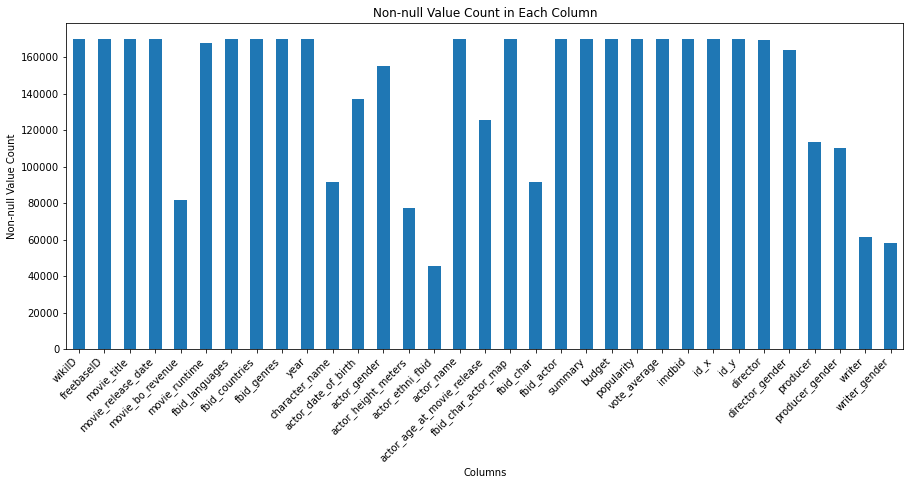

In [25]:
non_null_counts = movie_cleaned_df.notnull().sum()
non_null_counts.plot(kind='bar', figsize=(15, 6))
plt.title('Non-null Value Count in Each Column')
plt.xlabel('Columns')
plt.ylabel('Non-null Value Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# Missing Values Analysis

In [12]:
missing_values = movie_cleaned_df.isnull().sum()

missing_percentage = (movie_cleaned_df.isnull().sum() / len(movie_cleaned_df)) * 100

print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}).sort_values(by="Percentage", ascending=False))


                            Missing Values  Percentage
actor_ethni_fbid                    124585   73.230587
writer_gender                       111745   65.683284
writer                              108500   63.775885
actor_height_meters                  92723   54.502225
movie_bo_revenue                     88380   51.949426
character_name                       78713   46.267200
fbid_char                            78709   46.264849
producer_gender                      59689   35.084966
producer                             56417   33.161697
actor_age_at_movie_release           44672   26.258031
actor_date_of_birth                  33323   19.587132
actor_gender                         15149    8.904524
director_gender                       6049    3.555579
movie_runtime                         2266    1.331946
director                               983    0.577804
actor_name                             367    0.215721
fbid_actor                             297    0.174575
year      

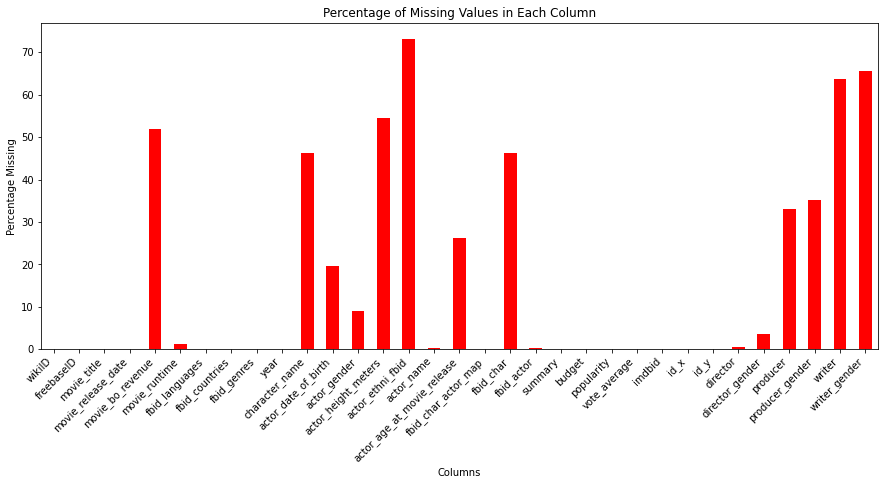

In [24]:
missing_percentage = (movie_cleaned_df.isnull().sum() / len(movie_cleaned_df)) * 100
missing_percentage.plot(kind='bar', figsize=(15, 6), color='red')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45, ha='right')
plt.show()


# Distribution of Key Features

In [15]:
# Distribution of actor gender
print(movie_cleaned_df['actor_gender'].value_counts(normalize=True))
print("")

# Distribution of director gender
print(movie_cleaned_df['director_gender'].value_counts(normalize=True))
print("")

# Distribution of producer gender
print(movie_cleaned_df['producer_gender'].value_counts(normalize=True))
print("")

# Distribution of writer gender
print(movie_cleaned_df['writer_gender'].value_counts(normalize=True))


M    0.674541
F    0.325459
Name: actor_gender, dtype: float64

M    0.939443
F    0.060557
Name: director_gender, dtype: float64

M    0.880902
F    0.119098
Name: producer_gender, dtype: float64

M    0.883937
F    0.116063
Name: writer_gender, dtype: float64


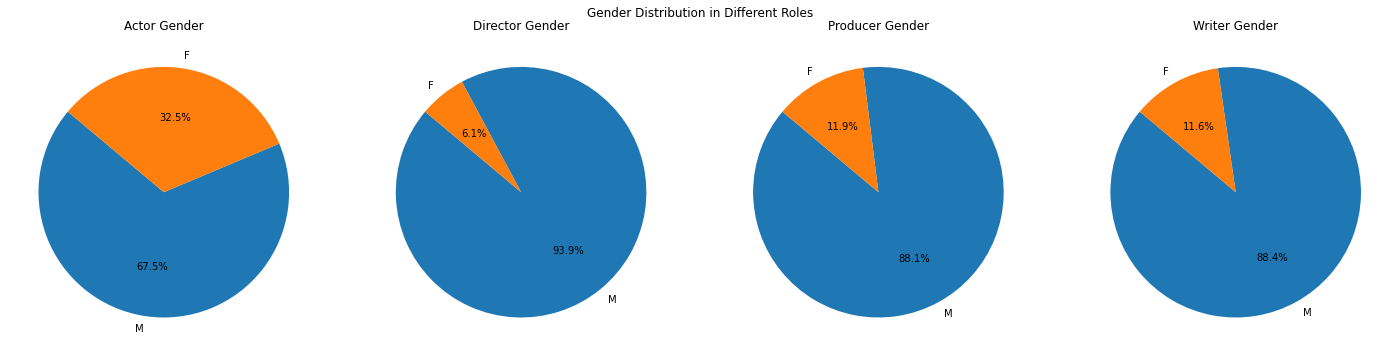

In [18]:
roles = ['actor_gender', 'director_gender', 'producer_gender', 'writer_gender']
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Gender Distribution in Different Roles')

for i, role in enumerate(roles):
    gender_counts = movie_cleaned_df[role].value_counts()
    axes[i].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(role.replace('_', ' ').title())

plt.tight_layout()
plt.show()


# Exploring Numeric Features

In [16]:
print(movie_cleaned_df.describe())


             wikiID  movie_bo_revenue  movie_runtime           year  \
count  1.701270e+05      8.174700e+04  167861.000000  170127.000000   
mean   9.136273e+06      7.591529e+07     105.253108    1988.899410   
std    9.916628e+06      1.491195e+08      26.051526      21.754745   
min    3.217000e+03      1.047400e+04       0.566667    1893.000000   
25%    1.428132e+06      5.781045e+06      91.000000    1977.000000   
50%    4.470790e+06      2.257359e+07     101.000000    1997.000000   
75%    1.496971e+07      7.837120e+07     115.000000    2006.000000   
max    3.737388e+07      2.782275e+09    1003.000000    2014.000000   

       actor_height_meters  actor_age_at_movie_release   vote_average  \
count         77404.000000               125455.000000  170127.000000   
mean              1.785753                   38.336384       6.029420   
std               3.765668                   14.353359       1.220987   
min               0.610000                  -81.000000       0.00000

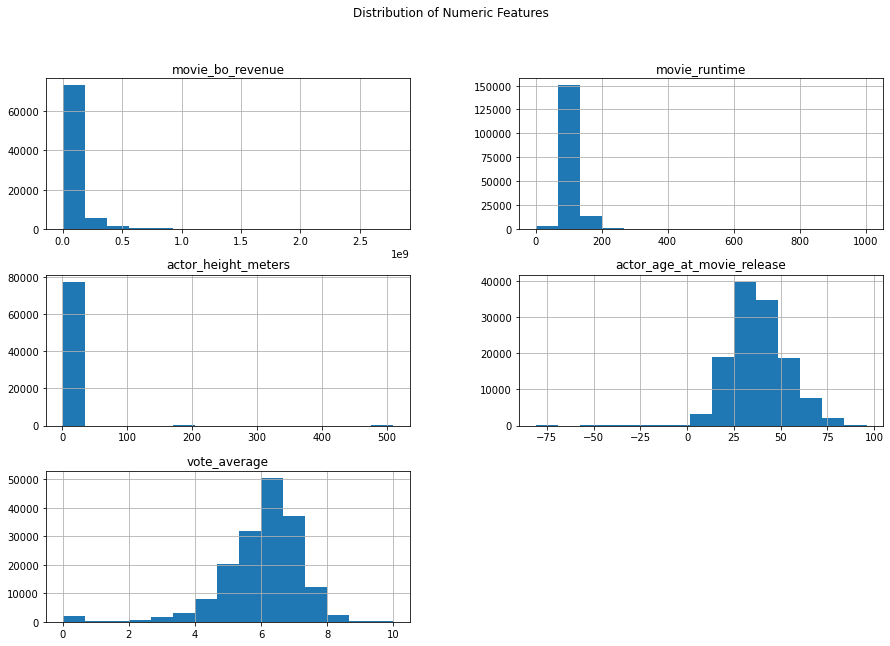

In [26]:
numeric_cols = ['movie_bo_revenue', 'movie_runtime', 'actor_height_meters', 
                'actor_age_at_movie_release', 'budget', 'popularity', 'vote_average']

movie_cleaned_df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()


# Potential Biases in the Data

In [17]:
print(movie_cleaned_df['year'].value_counts())

print(movie_cleaned_df['fbid_genres'].value_counts())


2009    7517
2010    7103
2006    6958
2008    6851
2011    6611
        ... 
1913       7
1903       3
1893       2
1904       1
1908       1
Name: year, Length: 111, dtype: int64
[Drama]                                                                                                     2608
[Romantic comedy, Romance Film, Comedy]                                                                     1650
[Comedy]                                                                                                    1541
[Romance Film, Drama]                                                                                        761
[Horror]                                                                                                     725
                                                                                                            ... 
[Science Fiction, Indie, Silent film, Black-and-white, Short Film, Adventure]                                  1
[Short Film, Splatter film] 

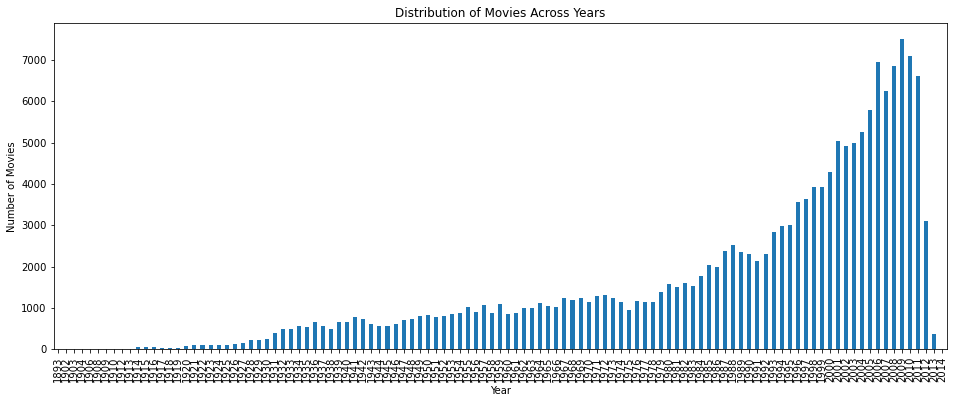

In [29]:
plt.figure(figsize=(16, 6))
movie_cleaned_df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Movies Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


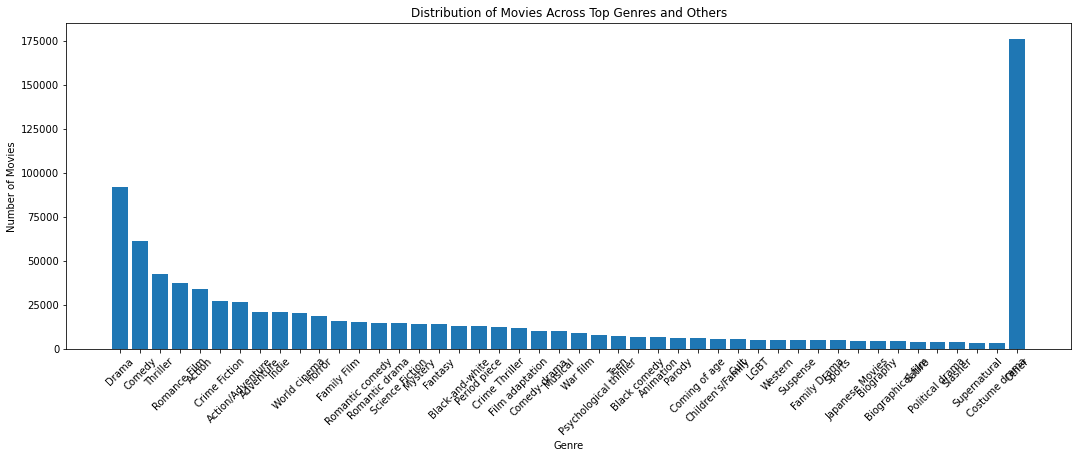

In [36]:
from collections import Counter

genre_counts = Counter()
movie_cleaned_df['fbid_genres'].dropna().apply(lambda x: genre_counts.update(x))

top_n = 45 
top_genres = genre_counts.most_common(top_n)
other_count = sum(count for genre, count in genre_counts.items() if genre not in [genre for genre, count in top_genres])
top_genres.append(('Other', other_count))

genres, counts = zip(*top_genres)

plt.figure(figsize=(18, 6))
plt.bar(genres, counts)
plt.title('Distribution of Movies Across Top Genres and Others')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()